<a href="https://colab.research.google.com/github/XVEREST/piano_youtube_to_piano_sheet/blob/main/piano_youtube_to_piano_sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m pip install --upgrade pytube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 429 kB/s 


In [ ]:
import pytube
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import ImageGrab

In [ ]:
# Input
ytLink = 'https://www.youtube.com/watch?v=KV5l6CXoR9w'
googleDrivePath = '/content/'

# height start, height stop, width start, width stop
note_area = [485,700,0,1280]

In [ ]:
myVideo = pytube.YouTube(ytLink)
videoName = myVideo.streams[0].title
stream = myVideo.streams.get_highest_resolution()
stream.download()

'/content/christmas meets boogie woogie.mp4'

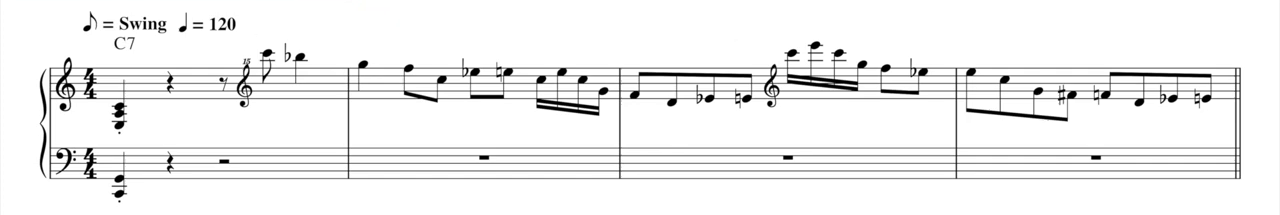

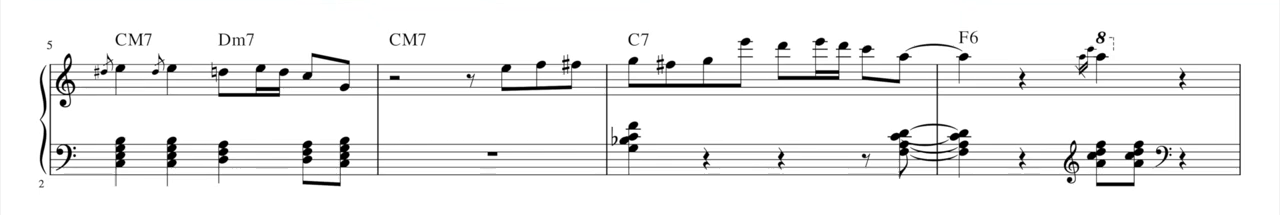

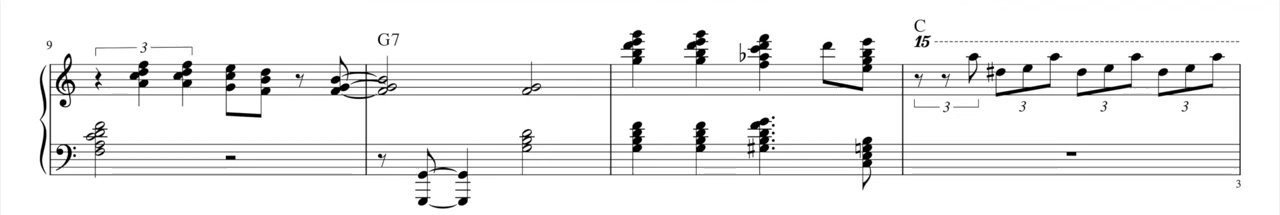

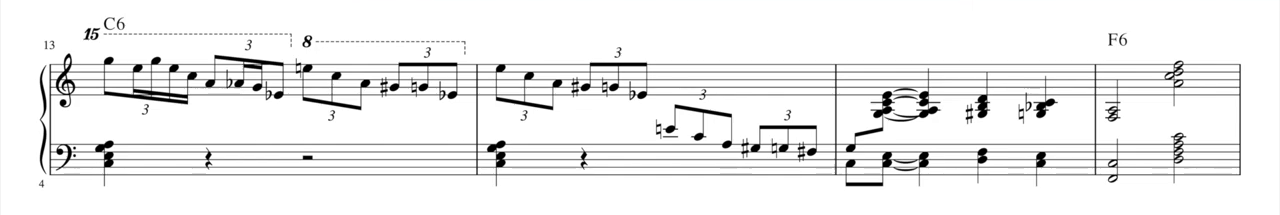

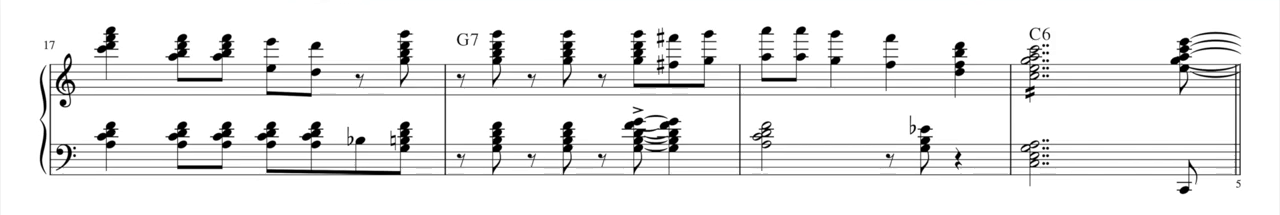

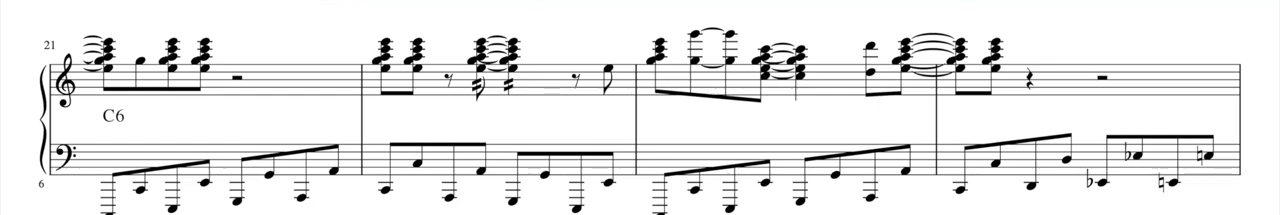

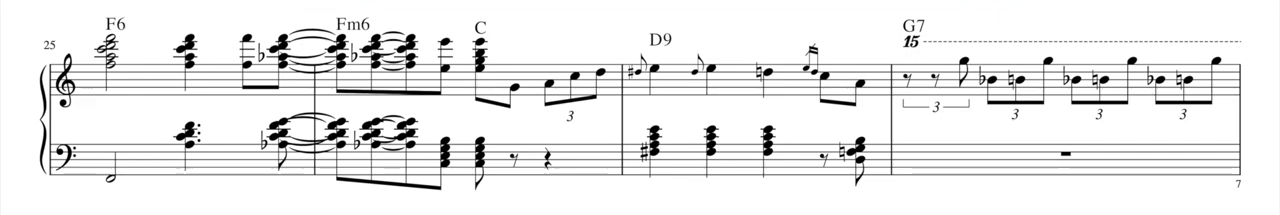

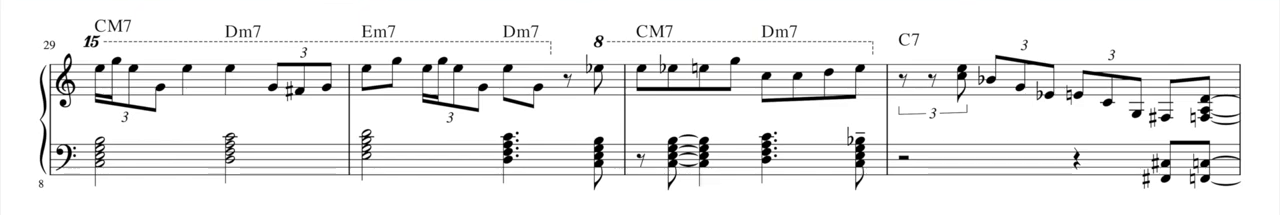

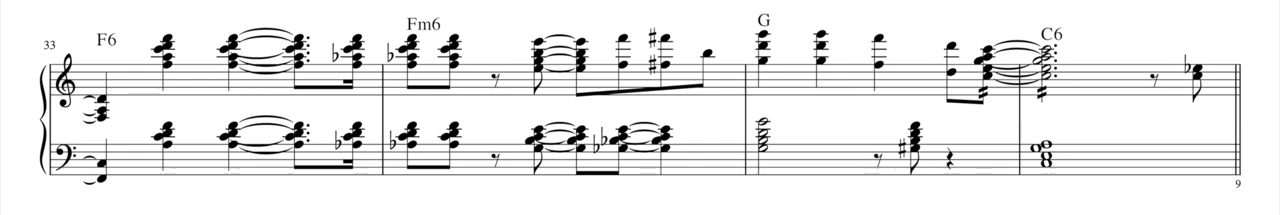

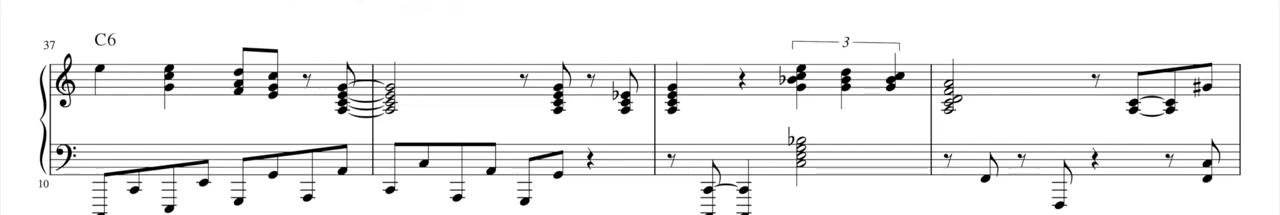

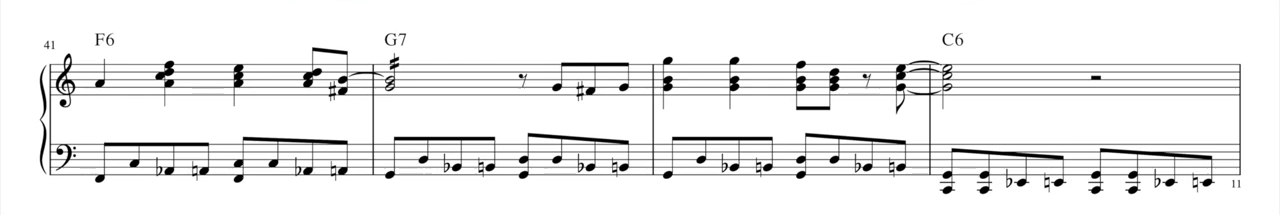

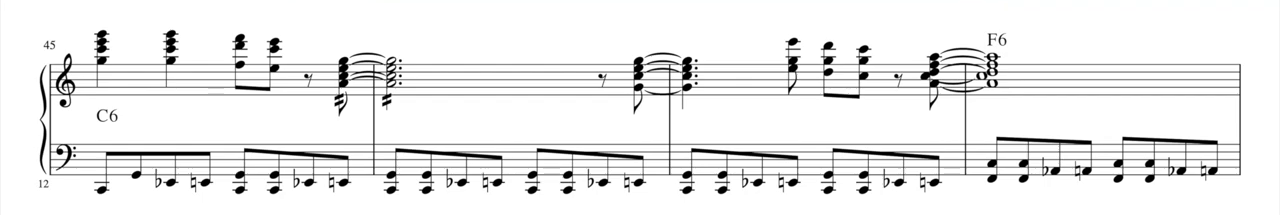

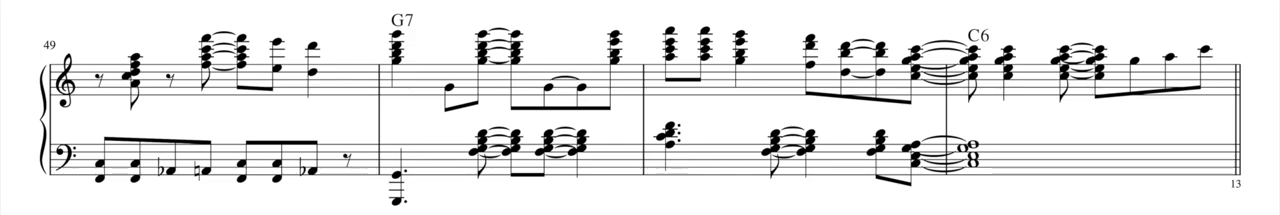

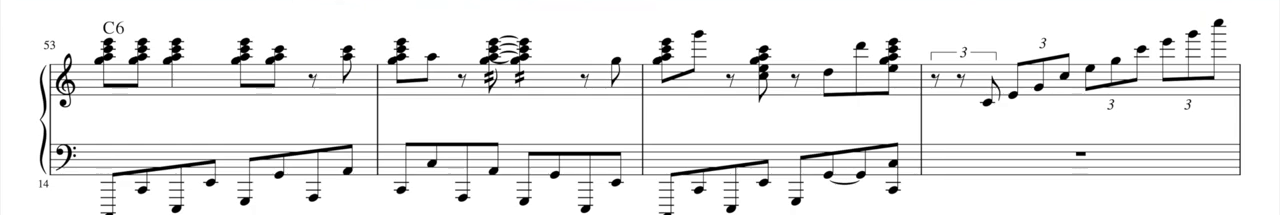

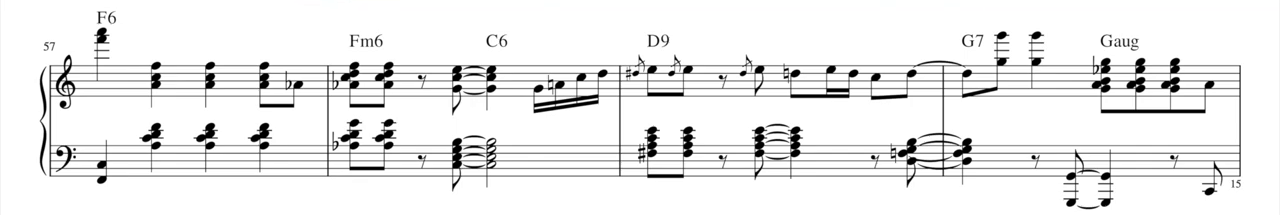

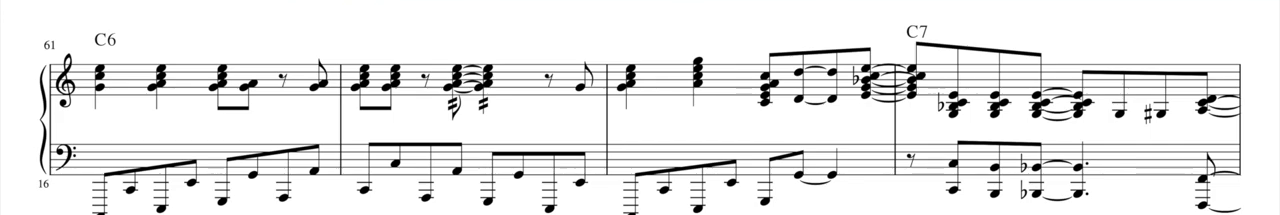

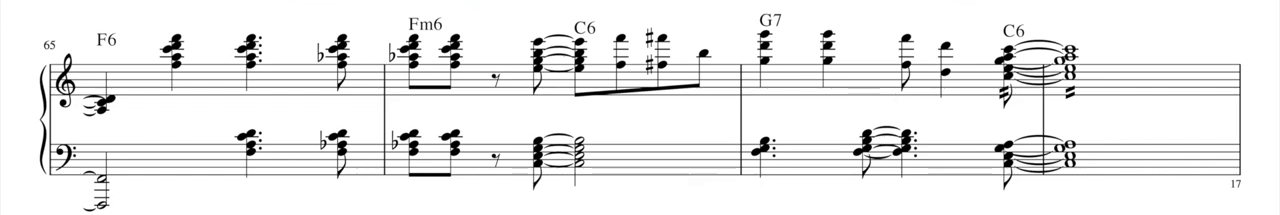

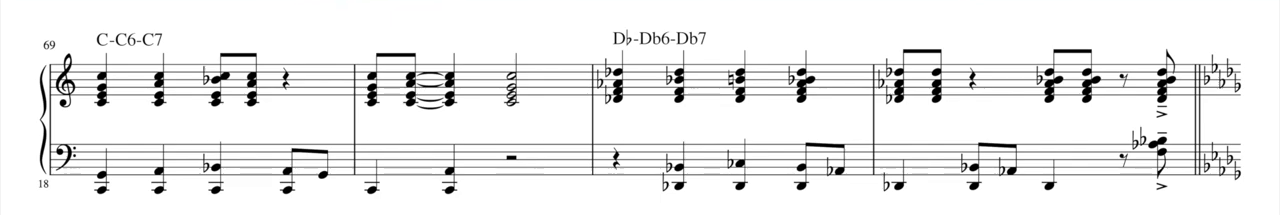

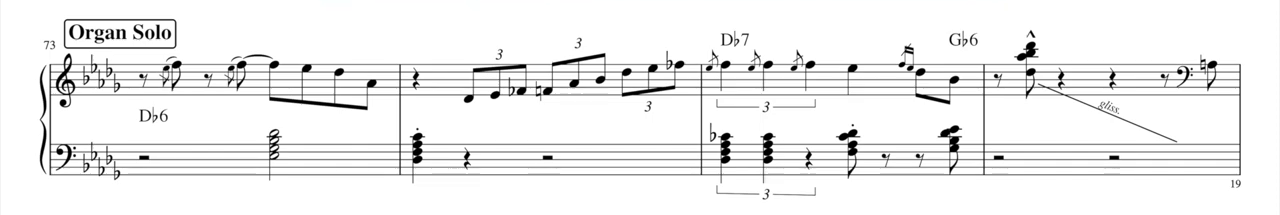

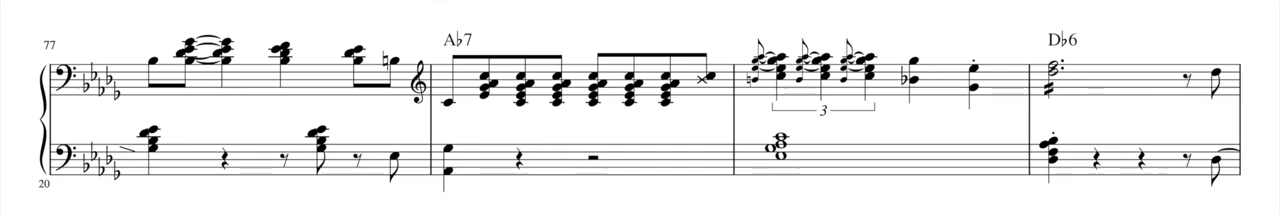

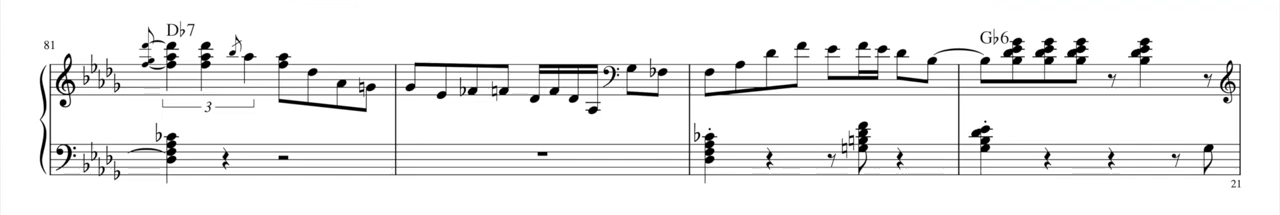

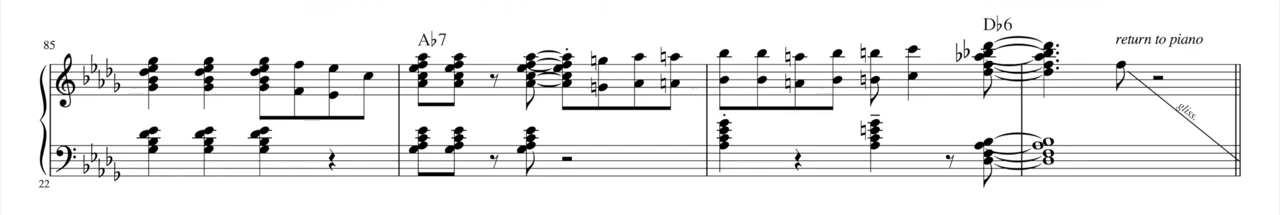

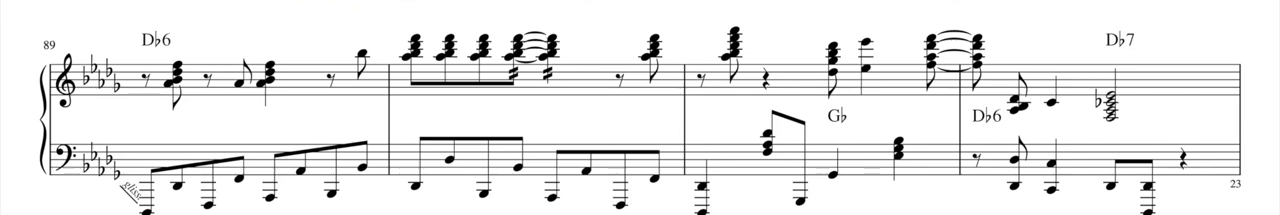

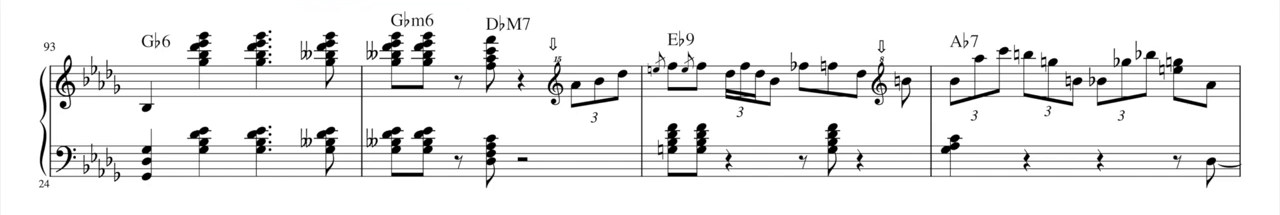

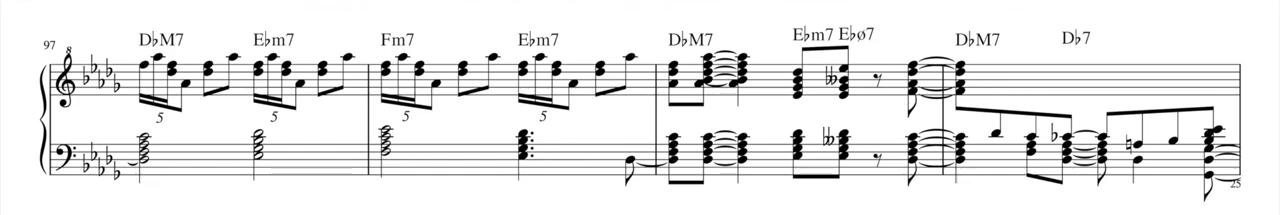

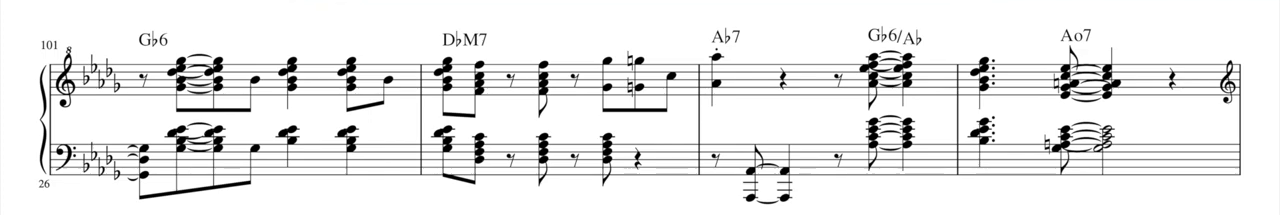

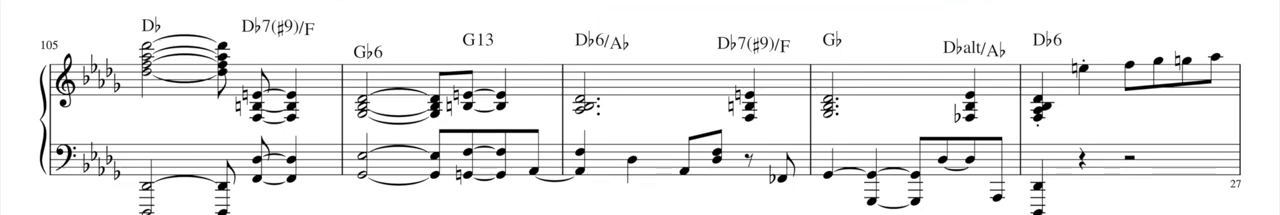

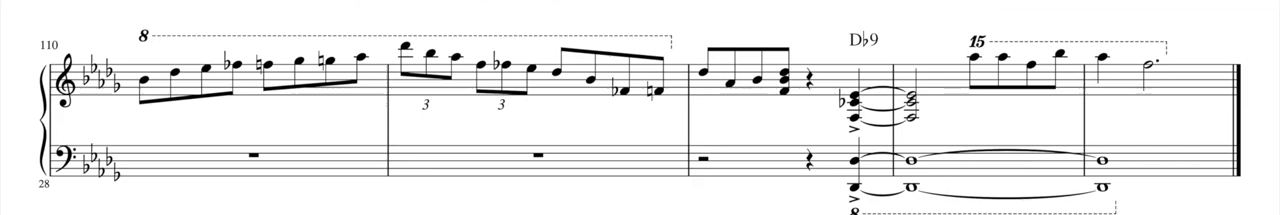

In [ ]:
cap = cv2.VideoCapture(googleDrivePath+videoName+'.mp4')
video_width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))   # 1280
video_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # 720
ret, frame1 = cap.read()
ret, frame2 = cap.read()
capCount = 0
while cap.isOpened():
  diff = cv2.absdiff(frame1[note_area[0]:note_area[1], note_area[2]:note_area[3]], frame2[note_area[0]:note_area[1], note_area[2]:note_area[3]])
  gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (5,5), 0)
  _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
  countW = np.sum(thresh == 255)
  countB = np.sum(thresh == 0)
  if (countB-countW)/(countB+countW) < 0.95:
    cv2_imshow(frame1[note_area[0]:note_area[1], note_area[2]:note_area[3]])
  frame1 = frame2
  ret, frame2 = cap.read()
  capCount += 1
  if not ret: break

cv2_imshow(frame1[note_area[0]:note_area[1], note_area[2]:note_area[3]])